 <center><h1 style="font-size:50px; color:green; font-family: Brush Script MT, Brush Script Std, cursive">Media Company Analysis<h1></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<font color= 'green'> <h2> Data Preprocessing </h2></font>

In [2]:
data = pd.read_csv('mediacompany.csv')
data.head()

Date  Views_show  Visitors  Views_platform  Ad_impression  \
0  3/1/2017      183738   1260228         1706478     1060860448   
1  3/2/2017      193763   1270561         1690727     1031846645   
2  3/3/2017      210479   1248183         1726157     1010867575   
3  3/4/2017      240061   1492913         1855353     1079194579   
4  3/5/2017      446314   1594712         2041418     1357736987   

   Cricket_match_india  Character_A  Unnamed: 7  
0                    0            0         NaN  
1                    0            0         NaN  
2                    0            0         NaN  
3                    1            0         NaN  
4                    0            0         NaN

In [3]:
del data['Unnamed: 7']
data.head()

Date  Views_show  Visitors  Views_platform  Ad_impression  \
0  3/1/2017      183738   1260228         1706478     1060860448   
1  3/2/2017      193763   1270561         1690727     1031846645   
2  3/3/2017      210479   1248183         1726157     1010867575   
3  3/4/2017      240061   1492913         1855353     1079194579   
4  3/5/2017      446314   1594712         2041418     1357736987   

   Cricket_match_india  Character_A  
0                    0            0  
1                    0            0  
2                    0            0  
3                    1            0  
4                    0            0

In [4]:
import datetime 
import calendar

In [5]:
data.isnull().sum()

Date                   0
Views_show             0
Visitors               0
Views_platform         0
Ad_impression          0
Cricket_match_india    0
Character_A            0
dtype: int64

#### Adding Day column to dataset

In [6]:
def findDay(date):
    born = datetime.datetime.strptime(date, '%d %m %Y').weekday()
    return (calendar.day_name[born])

In [7]:
date = data.loc[: ,'Date'].astype('datetime64[ns]').dt.strftime('%d %m %Y')

for i in date.head():
    print(findDay(i),":", i)

Wednesday : 01 03 2017
Thursday : 02 03 2017
Friday : 03 03 2017
Saturday : 04 03 2017
Sunday : 05 03 2017


In [8]:
day = np.array([findDay(x) for x in date])
data['Day'] = day
data.head()

Date  Views_show  Visitors  Views_platform  Ad_impression  \
0  3/1/2017      183738   1260228         1706478     1060860448   
1  3/2/2017      193763   1270561         1690727     1031846645   
2  3/3/2017      210479   1248183         1726157     1010867575   
3  3/4/2017      240061   1492913         1855353     1079194579   
4  3/5/2017      446314   1594712         2041418     1357736987   

   Cricket_match_india  Character_A        Day  
0                    0            0  Wednesday  
1                    0            0   Thursday  
2                    0            0     Friday  
3                    1            0   Saturday  
4                    0            0     Sunday

In [9]:
orig_data = data.copy(deep=True)

<font color='blue'> <h2> Data Analysis </h2> </font>

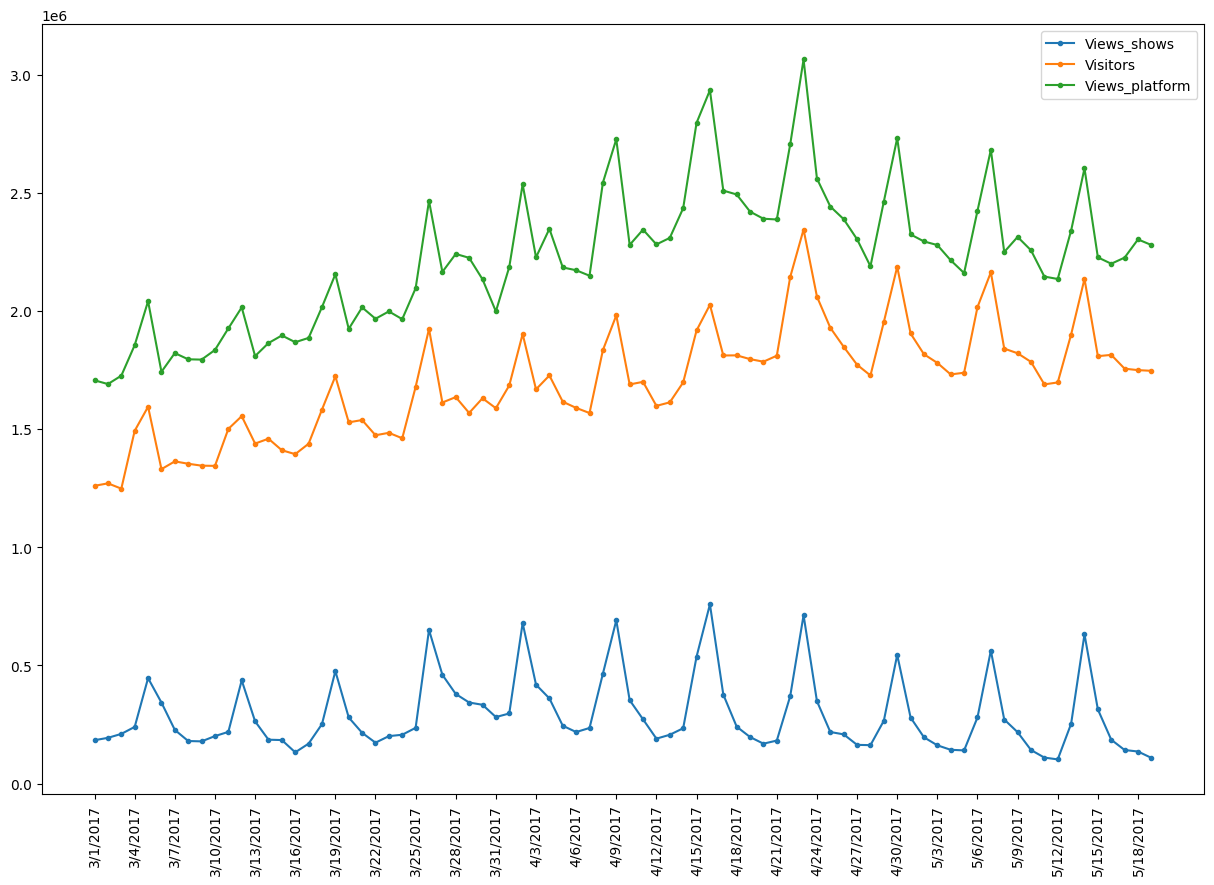

In [10]:
plt.figure(figsize=(15, 10))
plt.plot(data.Date, data.Views_show, label='Views_shows', marker= '.')
plt.plot(data.Date, data.Visitors, label='Visitors', marker= '.')
plt.plot(data.Date, data.Views_platform, label='Views_platform', marker= '.')
plt.xticks(data.Date[::3], rotation=90)
plt.legend()
plt.show()

#### Views_show Analysis with regression line

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
Views_model = LinearRegression()
Views_model.fit(np.arange(data.Date.shape[0]).reshape(data.Date.shape[0], 1), data.Views_show)
Views_pred = Views_model.predict(np.arange(data.Date.shape[0]).reshape(data.Date.shape[0], 1))
Views_pred

array([300046.89444444, 299790.07749648, 299533.26054852, 299276.44360056,
       299019.6266526 , 298762.80970464, 298505.99275668, 298249.17580872,
       297992.35886076, 297735.5419128 , 297478.72496484, 297221.90801688,
       296965.09106892, 296708.27412096, 296451.457173  , 296194.64022504,
       295937.82327707, 295681.00632911, 295424.18938115, 295167.37243319,
       294910.55548523, 294653.73853727, 294396.92158931, 294140.10464135,
       293883.28769339, 293626.47074543, 293369.65379747, 293112.83684951,
       292856.01990155, 292599.20295359, 292342.38600563, 292085.56905767,
       291828.7521097 , 291571.93516174, 291315.11821378, 291058.30126582,
       290801.48431786, 290544.6673699 , 290287.85042194, 290031.03347398,
       289774.21652602, 289517.39957806, 289260.5826301 , 289003.76568214,
       288746.94873418, 288490.13178622, 288233.31483826, 287976.4978903 ,
       287719.68094233, 287462.86399437, 287206.04704641, 286949.23009845,
       286692.41315049, 2

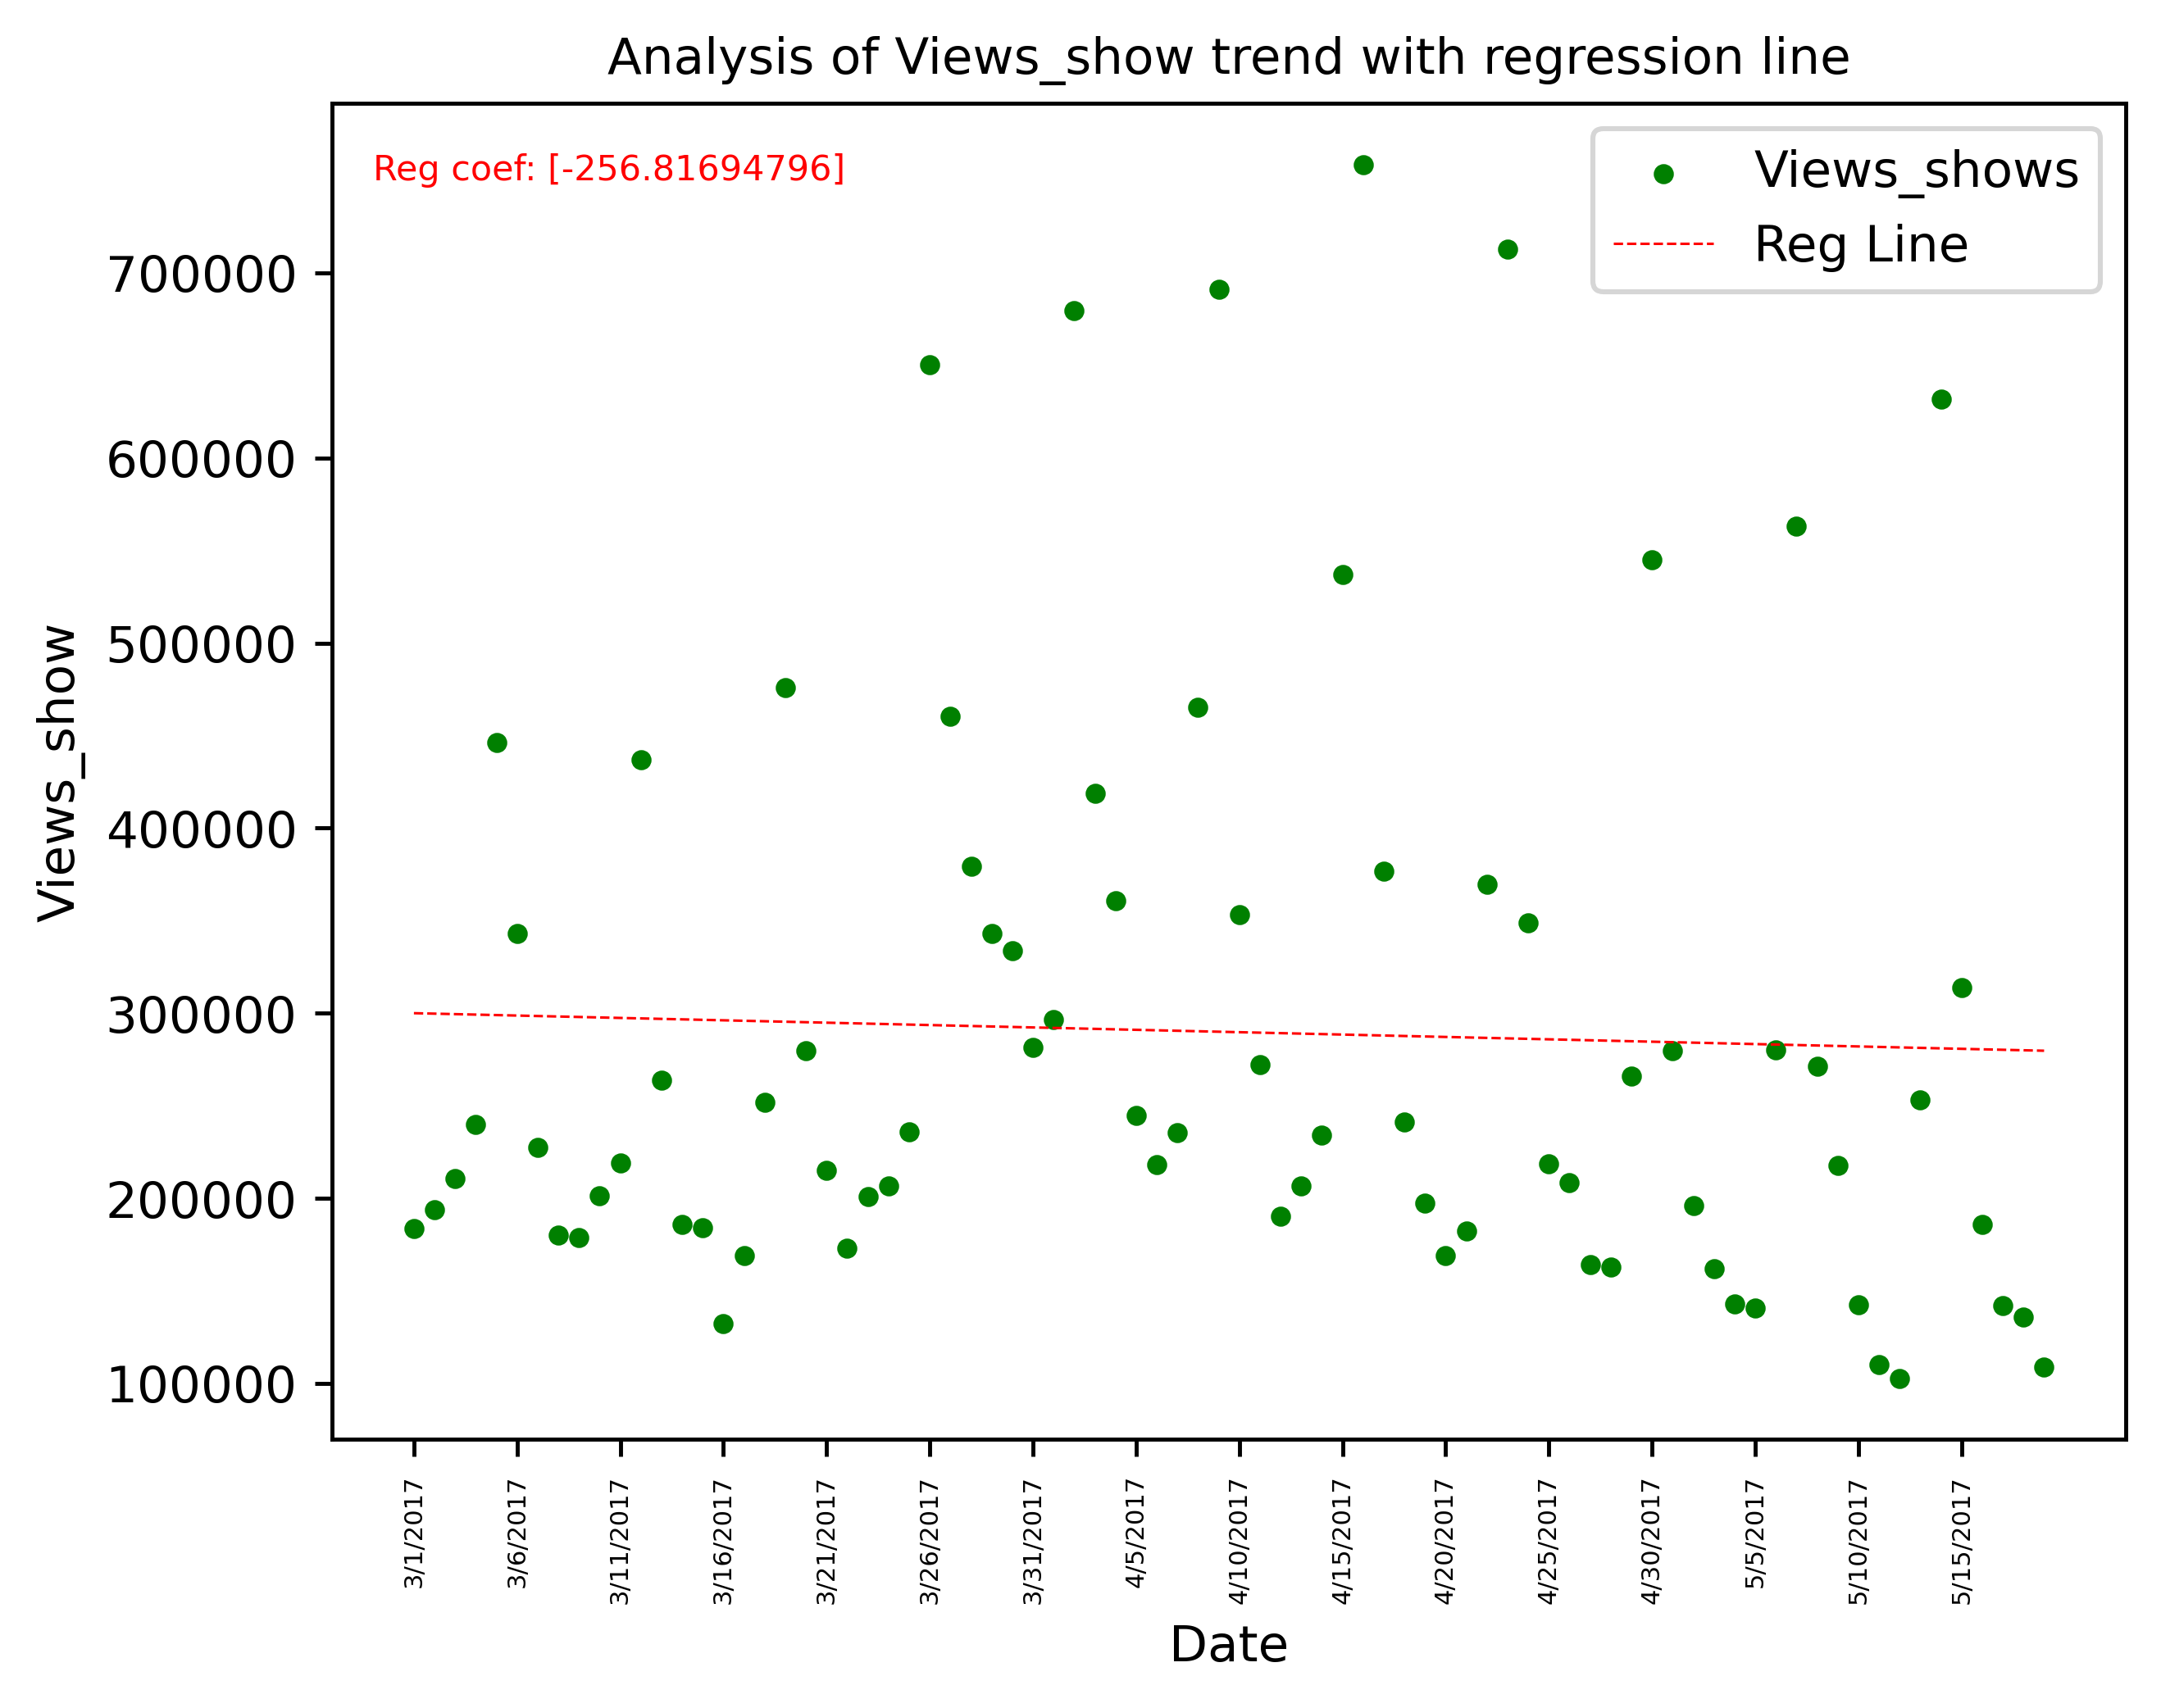

In [13]:
plt.figure(dpi = 441)
plt.scatter(data.Date, data.Views_show, label='Views_shows', marker= '.', color='green')
plt.plot(np.arange(data.Date.shape[0]).reshape(data.Date.shape[0], 1), Views_pred, linewidth= 0.5, color='red', linestyle='--', label = "Reg Line")
plt.text(-2, 750000, f'Reg coef: {Views_model.coef_}', fontsize=7, color='red')
plt.xticks(data.Date[::5], rotation=90, fontsize=5)
plt.xlabel("Date")
plt.ylabel("Views_show")
plt.legend()
plt.title('Analysis of Views_show trend with regression line', fontsize=10)
plt.show()

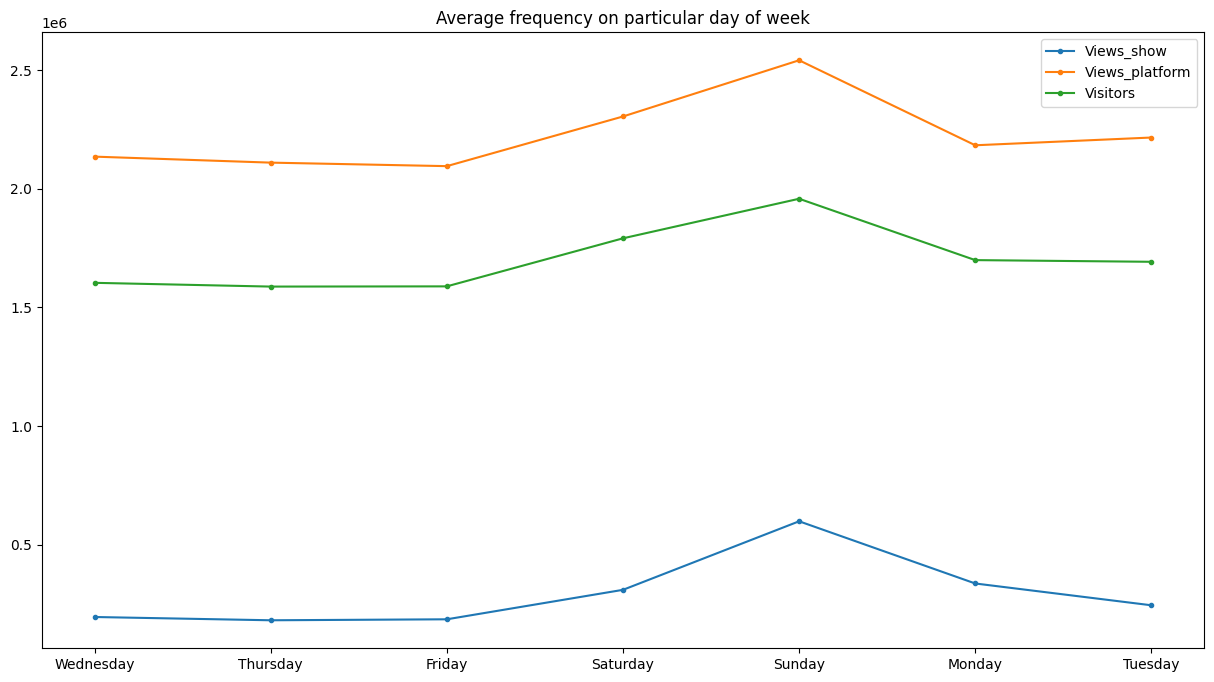

In [14]:
data.groupby(orig_data.Day, sort=False).mean(numeric_only=True)[['Views_show', 'Views_platform', 'Visitors']].astype("int").plot(kind='line',marker='.' , figsize=(15, 8))
plt.xticks(rotation=0)
plt.title('Average frequency on particular day of week')
plt.xlabel('')
plt.show()

#### Normalising data for further analysis

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
cols_to_scale = ['Views_show', 'Visitors', 'Views_platform', "Ad_impression"]
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [17]:
data.head()

Date  Views_show  Visitors  Views_platform  Ad_impression  \
0  3/1/2017    0.123787  0.010985        0.011466       0.035372   
1  3/2/2017    0.139066  0.020409        0.000000       0.014844   
2  3/3/2017    0.164544  0.000000        0.025792       0.000000   
3  3/4/2017    0.209631  0.223199        0.119842       0.048345   
4  3/5/2017    0.523988  0.316041        0.255290       0.245426   

   Cricket_match_india  Character_A        Day  
0                    0            0  Wednesday  
1                    0            0   Thursday  
2                    0            0     Friday  
3                    1            0   Saturday  
4                    0            0     Sunday

#### Adding bias to the normalised data

In [18]:
data.Visitors = data.Visitors + 1
data.Views_platform = data.Views_platform + 2
data.Ad_impression = data.Ad_impression + 3
data.head()

Date  Views_show  Visitors  Views_platform  Ad_impression  \
0  3/1/2017    0.123787  1.010985        2.011466       3.035372   
1  3/2/2017    0.139066  1.020409        2.000000       3.014844   
2  3/3/2017    0.164544  1.000000        2.025792       3.000000   
3  3/4/2017    0.209631  1.223199        2.119842       3.048345   
4  3/5/2017    0.523988  1.316041        2.255290       3.245426   

   Cricket_match_india  Character_A        Day  
0                    0            0  Wednesday  
1                    0            0   Thursday  
2                    0            0     Friday  
3                    1            0   Saturday  
4                    0            0     Sunday

#### Complete Data Visualization in Single plot

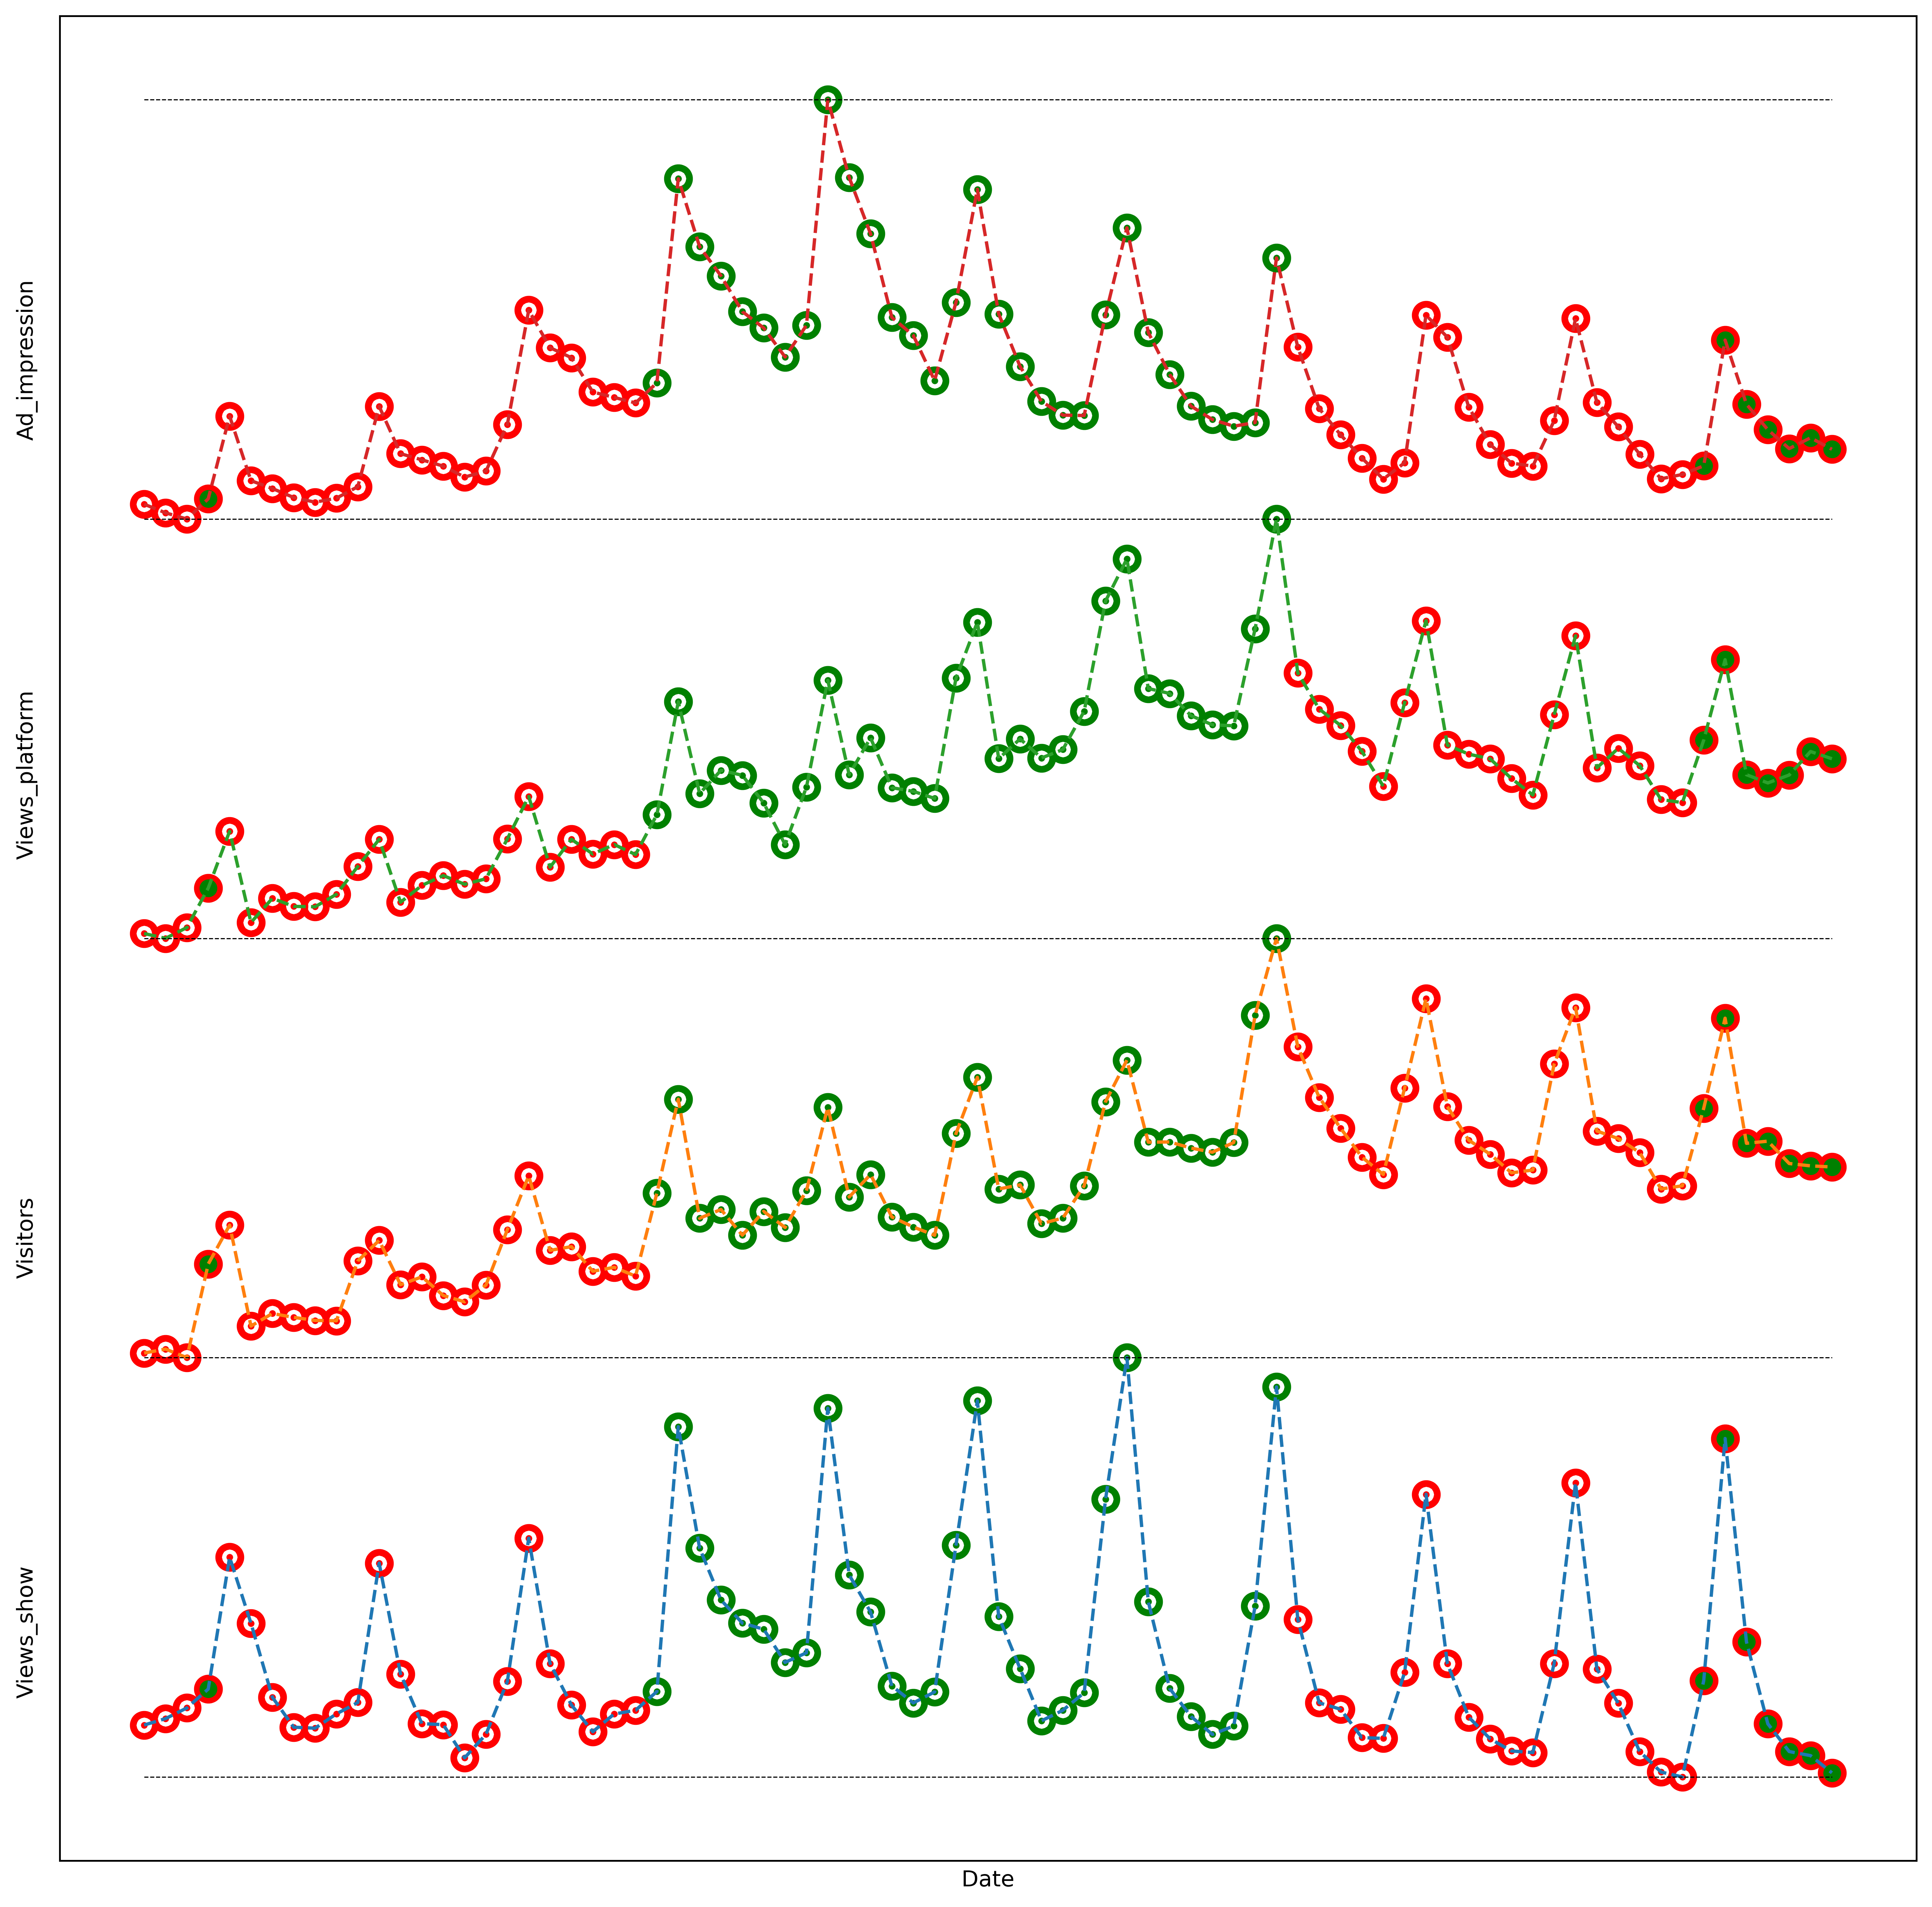

In [19]:
plt.figure(figsize=(15, 15), dpi=441)

# Views_show
plt.plot(data.Date, data.Views_show, label= 'Views', linestyle='--')
plt.scatter(data.groupby('Character_A').get_group(0).Date, data.groupby('Character_A').get_group(0).Views_show, label="Character Not Changed",  color='red', linewidth=10, marker='.')
plt.scatter(data.groupby('Character_A').get_group(1).Date, data.groupby('Character_A').get_group(1).Views_show, label="Character Changed", color='green', linewidth=10, marker='.')
plt.scatter(data.groupby('Cricket_match_india').get_group(1).Date, data.groupby('Cricket_match_india').get_group(1).Views_show, label='Cricket', color='green', linewidth=2)

# Visitors
plt.plot(data.Date, data.Visitors, label = 'Visitors', linestyle='--')
plt.scatter(data.groupby('Character_A').get_group(0).Date, data.groupby('Character_A').get_group(0).Visitors, label="Character Not Changed",  color='red', linewidth=10, marker='.')
plt.scatter(data.groupby('Character_A').get_group(1).Date, data.groupby('Character_A').get_group(1).Visitors, label="Character Changed", color='green', linewidth=10, marker='.')
plt.scatter(data.groupby('Cricket_match_india').get_group(1).Date, data.groupby('Cricket_match_india').get_group(1).Visitors, label='Cricket', color='green', linewidth=2)

# Views_platform
plt.plot(data.Date, data.Views_platform, label = 'Views_platfrom', linestyle='--')
plt.scatter(data.groupby('Character_A').get_group(0).Date, data.groupby('Character_A').get_group(0).Views_platform, label="Character Not Changed",  color='red', linewidth=10, marker='.')
plt.scatter(data.groupby('Character_A').get_group(1).Date, data.groupby('Character_A').get_group(1).Views_platform, label="Character Changed", color='green', linewidth=10, marker='.')
plt.scatter(data.groupby('Cricket_match_india').get_group(1).Date, data.groupby('Cricket_match_india').get_group(1).Views_platform, label='Cricket', color='green', linewidth=2)

# Ad_impression
plt.plot(data.Date, data.Ad_impression, label = "Ad_impression", linestyle='--')
plt.scatter(data.groupby('Character_A').get_group(0).Date, data.groupby('Character_A').get_group(0).Ad_impression, label="Character Not Changed",  color='red', linewidth=10, marker='.')
plt.scatter(data.groupby('Character_A').get_group(1).Date, data.groupby('Character_A').get_group(1).Ad_impression, label="Character Changed", color='green', linewidth=10, marker='.')
plt.scatter(data.groupby('Cricket_match_india').get_group(1).Date, data.groupby('Cricket_match_india').get_group(1).Ad_impression, label='Cricket', color='green', linewidth=2)

# Line seperator
plt.plot(data.Date, [0]*data.Date.shape[0],  label = "Line Seperator" , color='black', linestyle= '--', linewidth=0.5)
plt.plot(data.Date, [1]*data.Date.shape[0],  label = "Line Seperator" , color='black', linestyle= '--', linewidth=0.5)
plt.plot(data.Date, [2]*data.Date.shape[0],  label = "Line Seperator" , color='black', linestyle= '--', linewidth=0.5)
plt.plot(data.Date, [3]*data.Date.shape[0],  label = "Line Seperator" , color='black', linestyle= '--', linewidth=0.5)
plt.plot(data.Date, [4]*data.Date.shape[0],  label = "Line Seperator" , color='black', linestyle= '--', linewidth=0.5)


# plt.ylabel('Views                                     Visitors                                       Views_platform                                   Ad_impression')
plt.text(-6, 0.2, "Views_show", rotation=90)
plt.text(-6, 1.2, "Visitors", rotation=90)
plt.text(-6, 2.2, "Views_platform", rotation=90)
plt.text(-6, 3.2, "Ad_impression", rotation=90)

plt.xlabel('Date')
plt.xticks([])
plt.yticks([])
plt.show()


In [20]:
views_char_no_change = int(np.average(orig_data.groupby('Character_A').get_group(0).Views_show))
print(f'Avg Views when character not changed: {views_char_no_change}')
views_char_change = int(np.average(orig_data.groupby('Character_A').get_group(0).Views_show))
print(f'Avg Views when character changed: {views_char_change}')

print(f'Diffence: {views_char_change - views_char_no_change}')

Avg Views when character not changed: 241899
Avg Views when character changed: 241899
Diffence: 0


#### Complete Data Visualization in Single plot on every day of week

In [21]:
def View_trend(df, day):
    
    dd = df.groupby(df.Day)
    
    # Views_show
    plt.plot(dd.get_group(day).Date, dd.get_group(day).Views_show, label = "Views_show")
    plt.scatter(dd.get_group(day).groupby('Character_A').get_group(0).Date, dd.get_group(day).groupby('Character_A').get_group(0).Views_show, label = "Character Not Changed", marker='.', color='red', linewidth=10)
    plt.scatter(dd.get_group(day).groupby('Character_A').get_group(1).Date, dd.get_group(day).groupby('Character_A').get_group(1).Views_show, label = "Character Changed", marker='.', color='green', linewidth=10)
#     plt.scatter(dd.get_group(day).groupby('Cricket_match_india').get_group(0).Date, dd.get_group(day).groupby('Cricket_match_india').get_group(0).Views_show, label='Not Cricket', marker='|', color='black', linewidth=5)
    plt.scatter(dd.get_group(day).groupby('Cricket_match_india').get_group(1).Date, dd.get_group(day).groupby('Cricket_match_india').get_group(1).Views_show, label='Cricket', color='green', linewidth=2)
    
    
    # Visitors
    plt.plot(dd.get_group(day).Date, dd.get_group(day).Visitors, label = "Visitors", marker='.')
    plt.scatter(dd.get_group(day).groupby('Character_A').get_group(0).Date, dd.get_group(day).groupby('Character_A').get_group(0).Visitors, label = "Character Not Changed", marker='.', color='red', linewidth=10)
    plt.scatter(dd.get_group(day).groupby('Character_A').get_group(1).Date, dd.get_group(day).groupby('Character_A').get_group(1).Visitors, label = "Character Changed", marker='.', color='green', linewidth=10)
    
    # Views_platform
    plt.plot(dd.get_group(day).Date, dd.get_group(day).Views_platform, label = "Views_platform", marker='.')
    plt.scatter(dd.get_group(day).groupby('Character_A').get_group(0).Date, dd.get_group(day).groupby('Character_A').get_group(0).Views_platform, label = "Character Not Changed", marker='.', color='red', linewidth=10)
    plt.scatter(dd.get_group(day).groupby('Character_A').get_group(1).Date, dd.get_group(day).groupby('Character_A').get_group(1).Views_platform, label = "Character Changed", marker='.', color='green', linewidth=10)
    
    # Ad_impression
    plt.plot(dd.get_group(day).Date, dd.get_group(day).Ad_impression, label='Ad_impression', marker='.')
    plt.scatter(dd.get_group(day).groupby('Character_A').get_group(0).Date, dd.get_group(day).groupby('Character_A').get_group(0).Ad_impression, label = "Character Not Changed", marker='.', color='red', linewidth=10)
    plt.scatter(dd.get_group(day).groupby('Character_A').get_group(1).Date, dd.get_group(day).groupby('Character_A').get_group(1).Ad_impression, label = "Character Changed", marker='.', color='green', linewidth=10)
    
    # Line seperator
    plt.plot(dd.get_group(day).Date, [0]*dd.get_group(day).Date.shape[0], color='black', linestyle= '--', linewidth=0.5)
    plt.plot(dd.get_group(day).Date, [1]*dd.get_group(day).Date.shape[0], color='black', linestyle= '--', linewidth=0.5)
    plt.plot(dd.get_group(day).Date, [2]*dd.get_group(day).Date.shape[0], color='black', linestyle= '--', linewidth=0.5)
    plt.plot(dd.get_group(day).Date, [3]*dd.get_group(day).Date.shape[0], color='black', linestyle= '--', linewidth=0.5)
    plt.plot(dd.get_group(day).Date, [4]*dd.get_group(day).Date.shape[0], color='black', linestyle= '--', linewidth=0.5)
    
    plt.xticks([])
    plt.yticks([])
    plt.title(day)
    plt.xlabel('Date')
    plt.text(-1.1, 0.2, "Views_show", rotation=90)
    plt.text(-1.1, 1.2, "Visitors", rotation=90)
    plt.text(-1.1, 2.2, "Views_platform", rotation=90)
    plt.text(-1.1, 3.2, "Ad_impression", rotation=90)    
    

In [22]:
plt.figure(figsize=(25, 25), dpi=441)
plt.suptitle("Complete Data Visualization in Single plot on every day of week", fontsize=30)

# plt.subplot(341)
# View_trend(data, 'Monday')

# plt.subplot(342)
# View_trend(data, 'Tuesday')

# plt.subplot(343)
# View_trend(data, 'Wednesday')

# plt.subplot(344)
# View_trend(data, 'Thursday')

# plt.subplot(345)
# View_trend(data, 'Friday')

# plt.subplot(346)
# View_trend(data, 'Saturday')

# plt.subplot(347)
# View_trend(data, 'Sunday')


count = 1
for i in ['Sunday', 'Monday', 'Tuesday', 'Wednesday', "Thursday", 'Friday', "Saturday"]:
    coord = 340 + count
    plt.subplot(coord)
    View_trend(data, i)
    count+=1


plt.subplot(348)
plt.xticks([])
plt.yticks([])
plt.plot([0], [0], label = "Views_show")
plt.plot([0], [0], label = "Visitors")
plt.plot([0], [0], label = "Views_platform")
plt.plot([0], [0], label = "Ad_impression")


plt.scatter([0], [0], label = "Character Not Changed", marker='.', color='red', linewidth=10)
plt.scatter([0], [0], label = "Character Changed", marker='.', color='green', linewidth=10)
#     plt.scatter(dd.get_group(day).groupby('Cricket_match_india').get_group(0).Date, dd.get_group(day).groupby('Cricket_match_india').get_group(0).Views_show, label='Not Cricket', marker='|', color='black', linewidth=5)
plt.scatter([0], [0], label='Cricket', color='green', linewidth=2)
plt.axis('off')
plt.legend(loc='center', fontsize=20)
plt.show()



<font color='red'> <h2> Multiple Linear Regression </h2> </font>

<font color='orange'> <h2> Data Preparation </h2> </font>

In [23]:
data.head()

Date  Views_show  Visitors  Views_platform  Ad_impression  \
0  3/1/2017    0.123787  1.010985        2.011466       3.035372   
1  3/2/2017    0.139066  1.020409        2.000000       3.014844   
2  3/3/2017    0.164544  1.000000        2.025792       3.000000   
3  3/4/2017    0.209631  1.223199        2.119842       3.048345   
4  3/5/2017    0.523988  1.316041        2.255290       3.245426   

   Cricket_match_india  Character_A        Day  
0                    0            0  Wednesday  
1                    0            0   Thursday  
2                    0            0     Friday  
3                    1            0   Saturday  
4                    0            0     Sunday

### Checking correlation in data

In [24]:
heatMap = data[['Views_show', 'Visitors', 'Views_platform', 'Ad_impression', 'Cricket_match_india', 'Character_A']].corr()
heatMap

Views_show  Visitors  Views_platform  Ad_impression  \
Views_show             1.000000  0.535290        0.604279       0.785673   
Visitors               0.535290  1.000000        0.935832       0.478598   
Views_platform         0.604279  0.935832        1.000000       0.587003   
Ad_impression          0.785673  0.478598        0.587003       1.000000   
Cricket_match_india   -0.083154  0.147210        0.036575      -0.163936   
Character_A            0.402533  0.223093        0.452375       0.644354   

                     Cricket_match_india  Character_A  
Views_show                     -0.083154     0.402533  
Visitors                        0.147210     0.223093  
Views_platform                  0.036575     0.452375  
Ad_impression                  -0.163936     0.644354  
Cricket_match_india             1.000000    -0.258199  
Character_A                    -0.258199     1.000000

In [25]:
import seaborn as sns

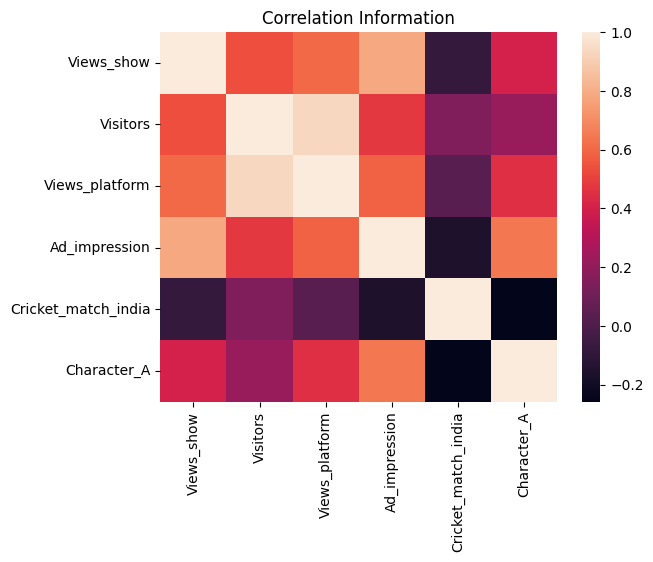

In [26]:
sns.heatmap(heatMap)
plt.title("Correlation Information")
plt.show()


### Spliting into Independent variable and Dependent variable

In [27]:
# Independent Variable
x = data[['Visitors', 'Views_platform', 'Ad_impression', 'Cricket_match_india', 'Character_A', 'Day']]
x.head()

Visitors  Views_platform  Ad_impression  Cricket_match_india  Character_A  \
0  1.010985        2.011466       3.035372                    0            0   
1  1.020409        2.000000       3.014844                    0            0   
2  1.000000        2.025792       3.000000                    0            0   
3  1.223199        2.119842       3.048345                    1            0   
4  1.316041        2.255290       3.245426                    0            0   

         Day  
0  Wednesday  
1   Thursday  
2     Friday  
3   Saturday  
4     Sunday

In [28]:
# Dependent Variable
y = data['Views_show']
y.head()

0    0.123787
1    0.139066
2    0.164544
3    0.209631
4    0.523988
Name: Views_show, dtype: float64

### Encoding Day into nominal order

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
ohe = OneHotEncoder(drop= 'first', sparse_output = False, dtype=np.int32)
day_encode_x = ohe.fit_transform(x[['Day']])

In [31]:
x_new = np.hstack((x[['Visitors', 'Views_platform', 'Ad_impression', 'Cricket_match_india', 'Character_A']].values, day_encode_x))
pd.DataFrame(x_new).head()

0         1         2    3    4    5    6    7    8    9    10
0  1.010985  2.011466  3.035372  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
1  1.020409  2.000000  3.014844  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
2  1.000000  2.025792  3.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  1.223199  2.119842  3.048345  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
4  1.316041  2.255290  3.245426  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0

### Spliting into train and test data

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.30, random_state=43)


In [34]:
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (56, 11)
x_test shape: (24, 11)
y_train shape: (56,)
y_test shape: (24,)


<font color ='orange'> <h2> Model Building </h2>  </font>

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<font color='green'> <h2> Model Analysis </h2> </font>

In [37]:
pred_train = model.predict(x_train)

In [38]:
pred_test = model.predict(x_test)

In [39]:
pred_all = model.predict(x_new)

### Coefficient of Determination

In [40]:
from sklearn.metrics import r2_score

In [41]:
print(f"r2 value of training: {r2_score(y_train, pred_train)}")
print(f"r2 value of testing: {r2_score(y_test, pred_test)}")
print(f"r2 value of complete Data: {r2_score(y, pred_all)}")


r2 value of training: 0.9299500404621269
r2 value of testing: 0.8848391732344474
r2 value of complete Data: 0.9124629862012006


<font color='green'><h2>Visual Presentation </h2> </font>

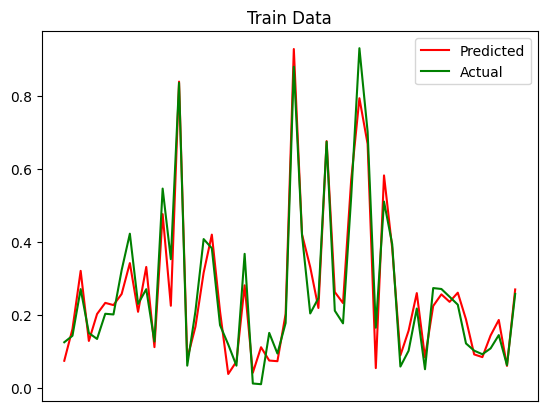

In [42]:
plt.plot(np.arange(pred_train.shape[0]), pred_train, color='red', label="Predicted")
plt.plot(np.arange(y_train.shape[0]), y_train, color='green', label="Actual")
plt.title("Train Data")
plt.legend()
plt.xticks([])
plt.show()



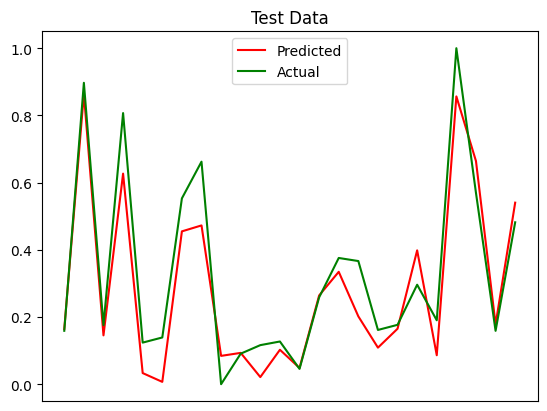

In [43]:
plt.plot(np.arange(pred_test.shape[0]), pred_test, color='red',  label='Predicted')
plt.plot(np.arange(pred_test.shape[0]), y_test, color='green', label='Actual')
plt.xticks([])
plt.title("Test Data")
plt.legend()
plt.show()

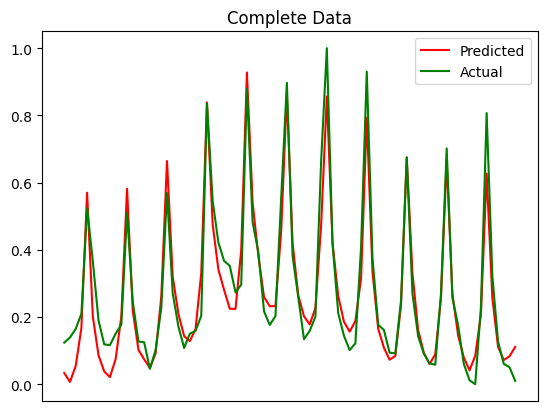

In [44]:
plt.plot(np.arange(pred_all.shape[0]), pred_all, color='red',  label='Predicted')
plt.plot(np.arange(pred_all.shape[0]), y, color='green', label='Actual')
plt.xticks([])
plt.title("Complete Data")
plt.legend()
plt.show()

<font color='orange'> <h2> Regression Model using OLS (Ordinal Least Square) </h2> </font>

In [45]:
import statsmodels.api as sm

In [46]:
x_with_const_train = sm.add_constant(x_train)
x_with_const_test = sm.add_constant(x_test)
x_with_const_all = sm.add_constant(x_new)

In [47]:
ols_model_train = sm.OLS(y_train, x_with_const_train)
ols_model_test = sm.OLS(y_test, x_with_const_test)
ols_model_all = sm.OLS(y, x_with_const_all)

In [48]:
result_train = ols_model_train.fit()
result_test = ols_model_test.fit()
result_all = ols_model_all.fit()

In [49]:
result_train.params

const   -1.395784
x1      -0.201554
x2       0.241020
x3       0.387666
x4      -0.012705
x5       0.035199
x6       0.124749
x7       0.129748
x8       0.429276
x9      -0.042407
x10      0.008466
x11     -0.028849
dtype: float64

In [50]:
print(result_train.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     53.10
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           1.03e-21
Time:                        20:57:27   Log-Likelihood:                 81.800
No. Observations:                  56   AIC:                            -139.6
Df Residuals:                      44   BIC:                            -115.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3958      0.374     -3.732      0.0

In [51]:
print(result_test.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     87.27
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           1.07e-09
Time:                        20:57:27   Log-Likelihood:                 49.664
No. Observations:                  24   AIC:                            -75.33
Df Residuals:                      12   BIC:                            -61.19
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2386      0.448     -4.992      0.0

In [52]:
print(result_all.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     78.04
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           4.09e-34
Time:                        20:57:27   Log-Likelihood:                 106.94
No. Observations:                  80   AIC:                            -189.9
Df Residuals:                      68   BIC:                            -161.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5755      0.281     -5.599      0.0

<font color='red'> <h1> Model building using Artificial Neural Network </h1> </font>

#### Using keras Library based on Tensorflow

In [53]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.optimizers import SGD

In [ ]:
model_ann = Sequential()
model_ann.add(Dense(11, input_dim=11, activation='relu'))
model_ann.add(Dense(11, activation='relu'))
model_ann.add(Dense(11, activation='relu'))
model_ann.add(Dense(11, activation='relu'))
model_ann.add(Dense(11, activation='relu'))
model_ann.add(Dense(11, activation='relu'))
model_ann.add(Dense(11, activation='relu'))

model_ann.add(Dense(1, activation='linear'))
model_ann.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mse'])
history = model_ann.fit(x_train, y_train, epochs=1000, validation_split=0.2)

Epoch 1/1000


Epoch 125/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 126/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0339 - mse: 0.0339 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 127/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0338 - mse: 0.0338 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 128/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0337 - mse: 0.0337 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 129/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0335 - mse: 0.0335 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 130/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0334 - mse: 0.0334 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 131/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0333 - mse: 0.0333 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 132/1000
2/2 [==============================] - 0s 25ms/step - 

2/2 [==============================] - 0s 27ms/step - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 187/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 188/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 189/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 190/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 191/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 192/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 193/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0241 - 

Epoch 248/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 249/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 250/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 251/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 252/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 253/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 254/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 255/1000
2/2 [==============================] - 0s 25ms/step - 

2/2 [==============================] - 0s 24ms/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 310/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 311/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 312/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 313/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 314/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 315/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 316/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0120 - 

Epoch 371/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 372/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 373/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 374/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 375/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 376/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 377/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 378/1000
2/2 [==============================] - 0s 23ms/step - 

2/2 [==============================] - 0s 26ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 433/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 434/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 435/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 436/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 437/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 438/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 439/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0088 - 

Epoch 494/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 495/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 496/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 497/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 498/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 499/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 500/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 501/1000
2/2 [==============================] - 0s 27ms/step - 

2/2 [==============================] - 0s 26ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 556/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 557/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 558/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 559/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 560/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 561/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 562/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0074 - 

Epoch 617/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 618/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 619/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 620/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 621/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 622/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 623/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 624/1000
2/2 [==============================] - 0s 28ms/step - 

2/2 [==============================] - 0s 24ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 679/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 680/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 681/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 682/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 683/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 684/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 685/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0067 - 

Epoch 740/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 741/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 742/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 743/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 744/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 745/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 746/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 747/1000
2/2 [==============================] - 0s 26ms/step - 

2/2 [==============================] - 0s 29ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 802/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 803/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 804/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 805/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 806/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 807/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 808/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0059 - 

Epoch 863/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 864/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 865/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 866/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 867/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 868/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 869/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 870/1000
2/2 [==============================] - 0s 23ms/step - 

2/2 [==============================] - 0s 23ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 925/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 926/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 927/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 928/1000
2/2 [==============================] - 0s 30ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 929/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 930/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 931/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0056 - 

Epoch 986/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 987/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 988/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 989/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 990/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 991/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 992/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 993/1000
2/2 [==============================] - 0s 23ms/step - 

In [ ]:
pd.DataFrame(history.history).plot()
plt.show()

In [ ]:
pred_train_ann = model_ann.predict(x_train)

In [ ]:
plt.plot(np.arange(56), pred_train_ann, label="ANN Predicted")
plt.plot(np.arange(56), y_train, label='Actual')
plt.legend()
plt.title("Train Data")
plt.xticks([])
plt.show()

In [ ]:
pred_test_ann = model_ann.predict(x_test)

In [ ]:
plt.plot(np.arange(24), pred_test_ann, label="ANN Predicted")
plt.plot(np.arange(24), y_test, label='Actual')
plt.legend(loc='upper center')
plt.title("Test Data")
plt.xticks([])
plt.show()

In [ ]:
pred_all_ann = model_ann.predict(x_new)

In [ ]:
plt.plot(np.arange(80), pred_all_ann, label="ANN Predicted")
plt.plot(np.arange(80), y, label='Actual')
plt.legend(loc='upper left')
plt.title("Complete Data")
plt.xticks([])
plt.show()

<font color='red'> <h2> ANN Model vs Regression Model </h2> </font>

In [ ]:
plt.figure(dpi=441)
plt.plot(np.arange(56), pred_train_ann, label="ANN Predicted")
plt.plot(np.arange(56), y_train, label='Actual')
plt.plot(np.arange(56), pred_train, label = "Regression Predicted")
plt.legend(loc='upper right', fontsize= 7)
plt.title("Train Data")
plt.xticks([])
plt.show()

In [ ]:
print(f'r2 score of train data: {r2_score(pred_train_ann, y_train)}')
      

In [ ]:
plt.figure(dpi=441)
plt.plot(np.arange(24), pred_test_ann, label="ANN Predicted")
plt.plot(np.arange(24), y_test, label='Actual')
plt.plot(np.arange(24), pred_test, label = "Regression Predicted")
plt.legend(loc='upper center', fontsize= 7)
plt.title("Test Data")
plt.xticks([])
plt.show()

In [ ]:
print(f'r2 score of test data: {r2_score(pred_test_ann, y_test)}')

In [ ]:
plt.figure(dpi=441)
plt.plot(np.arange(80), pred_all_ann, label="ANN Predicted")
plt.plot(np.arange(80), y, label='Actual')
plt.plot(np.arange(80), pred_all, label = "Regression Predicted")
plt.legend(loc='upper left', fontsize=7)
plt.title("Complete Data")
plt.xticks([])
plt.show()

In [ ]:
print(f'r2 score of all data: {r2_score(pred_all_ann, y)}')


 <center><h1 style="font-size:50px; color:red; font-family: Impact, fantasy"> THE END <h1></center>